<a href="https://colab.research.google.com/github/programacaodinamica/analise-dados/blob/master/notebooks/Analise_Tendencia_Eleicoes_Municipais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

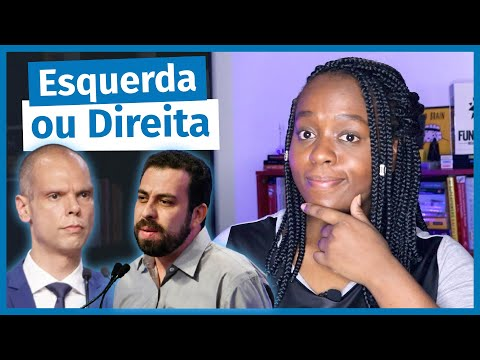

In [8]:
from IPython.display import YouTubeVideo

YouTubeVideo('ZZMEUFyKqpE', width=640, height=360)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.13.0)


In [ ]:
!pip install geopandas

In [ ]:
#Importando pacotes necessários
import os
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 

Os arquivos utilizados na análise a seguir estão disponíveis nos links:
1. [Repositório de Dados Eleitorais](https://www.tse.jus.br/hotsites/pesquisas-eleitorais/resultados.html) 
2. [Partidos 2020](https://github.com/programacaodinamica/analise-dados/blob/master/dados/partidos2020%20.csv)
3. [Brasil ShapeFile](https://drive.google.com/file/d/1QjyVm83FrIkZ6v-pLZuHAorLydh0z0aN/view?usp=sharing)

In [ ]:
#Caminho para os arquivos utilizados
pasta = '/content/drive/MyDrive/Colab Datasets/eleicoes/'
arquivo_resultado_2020 = os.path.join(pasta, 'votacao_candidato_munzona_2020.zip')
arquivo_resultado_2016 = os.path.join(pasta, 'votacao_candidato_munzona_2016.zip')
arquivo_candidatos_2020 = os.path.join(pasta, 'consulta_cand_2020.zip')
arquivo_partidos = os.path.join(pasta,'partidos2020.csv')
arquivo_BR_municipios_shapefile = '/content/drive/MyDrive/Colab Datasets/MC01/BR_Municipios/BR_Municipios_2019.shp'

In [ ]:
#alterando formato de exibição dos gráficos do Pandas
pd.options.plotting.backend = 'plotly'

In [ ]:
#variáveis globais
LOCAL = 'BRASIL' # Recebe a sigla da UF ou BRASIL
TIPO_CANDIDATO = 'Prefeito' #Recebe Vereador pu Prefeito

In [ ]:
with ZipFile(arquivo_resultado_2020) as z:
  with z.open(f'votacao_candidato_munzona_2020_{LOCAL}.csv') as f:
    resultado_2020 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

In [ ]:
with ZipFile(arquivo_resultado_2016) as z:
  with z.open(f'votacao_candidato_munzona_2016_{LOCAL}.csv') as f:
    resultado_2016 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

In [ ]:
resultado_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007329 entries, 0 to 1007328
Data columns (total 38 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   DT_GERACAO                1007329 non-null  object
 1   HH_GERACAO                1007329 non-null  object
 2   ANO_ELEICAO               1007329 non-null  int64 
 3   CD_TIPO_ELEICAO           1007329 non-null  int64 
 4   NM_TIPO_ELEICAO           1007329 non-null  object
 5   NR_TURNO                  1007329 non-null  int64 
 6   CD_ELEICAO                1007329 non-null  int64 
 7   DS_ELEICAO                1007329 non-null  object
 8   DT_ELEICAO                1007329 non-null  object
 9   TP_ABRANGENCIA            1007329 non-null  object
 10  SG_UF                     1007329 non-null  object
 11  SG_UE                     1007329 non-null  int64 
 12  NM_UE                     1007329 non-null  object
 13  CD_MUNICIPIO              1007329 non-null

In [ ]:
candidatos_mais_votados_2020 = resultado_2020[resultado_2020['DS_CARGO']== TIPO_CANDIDATO]\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

In [ ]:
candidatos_mais_votados_2020

NM_URNA_CANDIDATO  ... QT_VOTOS_NOMINAIS
NR_CANDIDATO NM_UE                                    ...                  
45           SÃO PAULO                   BRUNO COVAS  ...           1754013
25           RIO DE JANEIRO             EDUARDO PAES  ...            974804
55           BELO HORIZONTE                    KALIL  ...            784307
25           SALVADOR                     BRUNO REIS  ...            779408
             CURITIBA                   RAFAEL GRECA  ...            499821
...                                              ...  ...               ...
90           TORIXORÉU                         RUBÃO  ...               196
50           BOM JESUS                   IRMÃO MAZIM  ...                97
25           SANTO ANTÔNIO DO TAUÁ  EVANDRO TRABALHO  ...                 0
20           BELÉM                               BEL  ...                 0
45           ANHEMBI                  MIGUEL MACHADO  ...                 0

[5556 rows x 7 columns]

In [ ]:
candidatos_mais_votados_2016 = resultado_2016[resultado_2016['DS_CARGO']==TIPO_CANDIDATO]\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

In [ ]:
candidatos_mais_votados_2016

,,NM_URNA_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS
NR_CANDIDATO,NM_UE,,,,,,,
45,SÃO PAULO,JOÃO DORIA,SÃO PAULO,71072,ELEITO,45,PSDB,3085187
10,RIO DE JANEIRO,CRIVELLA,RIO DE JANEIRO,60011,2º TURNO,10,PRB,2542231
12,FORTALEZA,ROBERTO CLAUDIO,FORTALEZA,13897,2º TURNO,12,PDT,1203820
25,SALVADOR,ACM NETO,SALVADOR,38490,ELEITO,25,DEM,982246
40,RECIFE,GERALDO JULIO,RECIFE,25313,ELEITO,40,PSB,959332
...,...,...,...,...,...,...,...,...
10,BOM JARDIM,MARCILIO DA ULFER,BOM JARDIM,58092,NÃO ELEITO,10,PRB,375
31,NOVA VENEZA,SERGINHO DO SOUZA,NOVA VENEZA,94978,NÃO ELEITO,31,PHS,158
45,JANDAÍRA,REGINALDO DANTAS,JANDAÍRA,16993,NÃO ELEITO,45,PSDB,115


In [ ]:
candidatos_mais_votados_2020.SG_PARTIDO.value_counts().plot(kind='bar',title=f'Partido Mais Votados {LOCAL} 2020 ({TIPO_CANDIDATO})')

In [ ]:
candidatos_mais_votados_2016.SG_PARTIDO.value_counts().plot(kind='bar',title=f'Partido Mais Votados {LOCAL} 2016 ({TIPO_CANDIDATO})')

In [ ]:
partidos = pd.read_csv(arquivo_partidos)

In [ ]:
partidos

,Espectro,SG_PARTIDO_TR,SG_PARTIDO,NR_PARTIDO
0,centro,AVANTE,AVANTE,70
1,direita,DC,DC,27
2,direita,DEM,DEM,25
3,centro,MDB,MDB,15
4,direita,NOVO,NOVO,30
5,direita,PATRIOTA,PATRIOTA,51
6,esquerda,PCB,PCB,21
7,esquerda,PCDOB,PC do B,65
8,esquerda,PCO,PCO,29
9,esquerda,PDT,PDT,12


In [ ]:
espec_type = pd.CategoricalDtype(categories=['direita', 'centro', 'esquerda'], ordered=True)

In [ ]:
partidos['Espectro'] = partidos['Espectro'].astype(espec_type)

In [ ]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Espectro       33 non-null     category
 1   SG_PARTIDO_TR  33 non-null     object  
 2   SG_PARTIDO     33 non-null     object  
 3   NR_PARTIDO     33 non-null     int64   
dtypes: category(1), int64(1), object(2)
memory usage: 1.0+ KB


In [ ]:
candidatos_mais_votados_2020 = candidatos_mais_votados_2020.\
merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

In [ ]:
candidatos_mais_votados_2016 = candidatos_mais_votados_2016.\
merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

In [ ]:
candidatos_mais_votados_2016

,NM_URNA_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS,Espectro
0,JOÃO DORIA,SÃO PAULO,71072,ELEITO,45,PSDB,3085187,centro
1,JOÃO LEITE,BELO HORIZONTE,41238,2º TURNO,45,PSDB,953308,centro
2,ARTUR NETO,MANAUS,2550,2º TURNO,45,PSDB,946264,centro
3,ZENALDO COUTINHO,BELÉM,4278,2º TURNO,45,PSDB,640158,centro
4,NELSON MARCHEZAN JUNIOR,PORTO ALEGRE,88013,2º TURNO,45,PSDB,615811,centro
...,...,...,...,...,...,...,...,...
5493,ELSON 70,SERRA DO NAVIO,6106,ELEITO,70,PT do B,1708,centro
5494,LAURO FRANCO,FREI GASPAR,45357,ELEITO,70,PT do B,1539,centro
5495,PAULINHO ENFERMEIRO,SÃO GONÇALO DO GURGUÉIA,12610,ELEITO,70,PT do B,1090,centro
5496,OTON MARIO,JAÇANÃ,16977,ELEITO,50,PSOL,2494,esquerda


## Quem venceu mais: Esquerda ou Direita?

In [ ]:
geo_df = gpd.read_file(arquivo_BR_municipios_shapefile)

In [ ]:
if LOCAL != 'BRASIL':
  geo_df = geo_df[geo_df.SIGLA_UF == LOCAL]

geo_df['NM_MUN'] = geo_df['NM_MUN'].str.upper()

In [ ]:
candidatos_mais_votados_2020_geo_df = geo_df.merge(candidatos_mais_votados_2020, left_on='NM_MUN', right_on='NM_MUNICIPIO')
candidatos_mais_votados_2016_geo_df = geo_df.merge(candidatos_mais_votados_2016, left_on='NM_MUN', right_on='NM_MUNICIPIO')

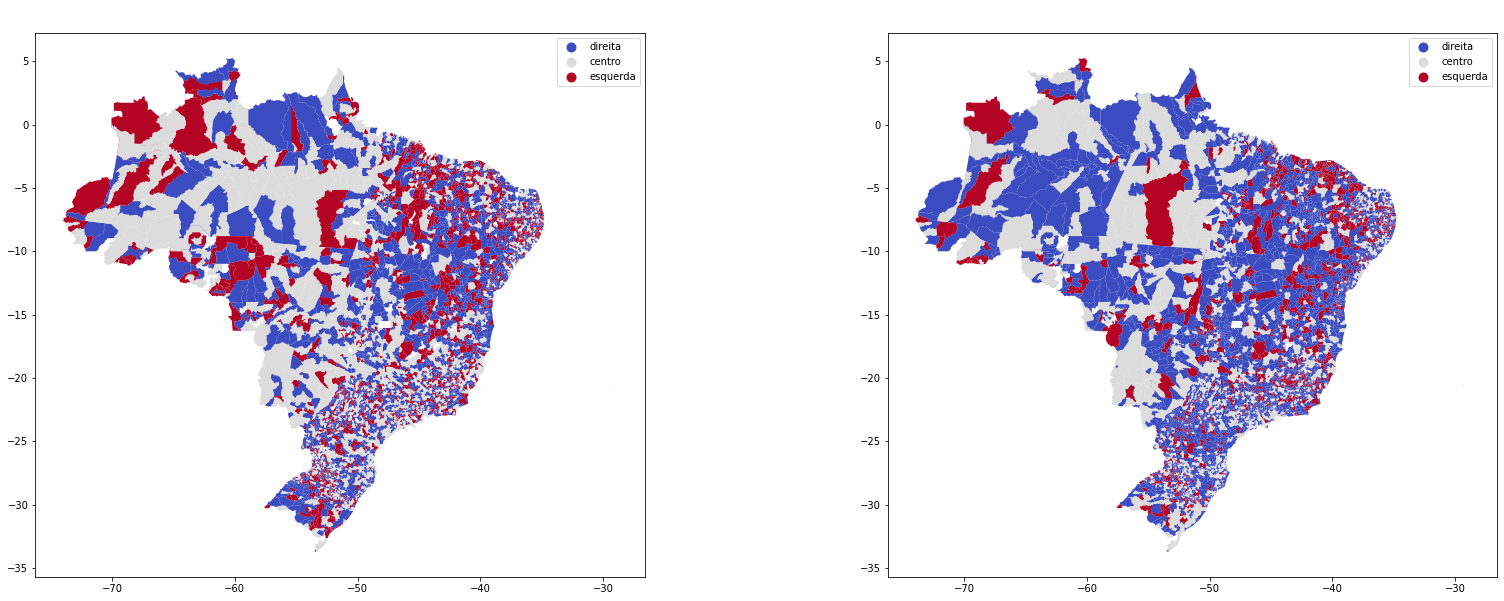

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(28,10))
ax[0].set_title(f'Espectro Mais Votados {LOCAL} 2016 ({TIPO_CANDIDATO})', color='white', size=26)
ax[1].set_title(f'Espectro Mais Votados {LOCAL} 2020 ({TIPO_CANDIDATO})', color='white', size=26)

candidatos_mais_votados_2020_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[1])
candidatos_mais_votados_2016_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[0]);

In [ ]:
candidatos_mais_votados_2016.Espectro.value_counts().plot(kind='bar',title=f'Espectro Mais Votados {LOCAL} 2016 ({TIPO_CANDIDATO})')

In [ ]:
candidatos_mais_votados_2020.Espectro.value_counts().plot(kind='bar',title=f'Espectro Mais Votados {LOCAL} 2020 ({TIPO_CANDIDATO})')

## Analisando distribuição dos Vereadores Eleitos

In [ ]:
vereadores_eleitos_2020 = resultado_2020[(resultado_2020['DS_CARGO']=='Vereador')&(resultado_2020['DS_SIT_TOT_TURNO'].str.contains('ELEITO POR'))]\
                    .groupby(['NR_CANDIDATO','NM_UE'])\
                    .agg({'NM_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 
                          'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
                          'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
                    .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
                  .merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO').reset_index(drop=True)

In [ ]:
vereadores_eleitos_2016 = resultado_2016[(resultado_2016['DS_CARGO']=='Vereador')&
                                         (resultado_2016['DS_SIT_TOT_TURNO'].str.contains('ELEITO POR'))]\
                    .groupby(['NR_CANDIDATO','NM_UE'])\
                    .agg({'NM_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 
                          'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
                          'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
                    .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
                  .merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO').reset_index(drop=True)

In [ ]:
vereadores_eleitos_2016.Espectro.value_counts().plot(kind='bar',title='Espectro Vereadores Eleitos 2016')

In [ ]:
vereadores_eleitos_2020.Espectro.value_counts().plot(kind='bar',title='Espectro Vereadores Eleitos 2020')

## Análise de Candidatos 2020

In [ ]:
with ZipFile(arquivo_candidatos_2020) as z:
  with z.open(f'consulta_cand_2020_{LOCAL}.csv') as f:
    candidatos_2020 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

In [ ]:
candidatos_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557633 entries, 0 to 557632
Data columns (total 63 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   DT_GERACAO                     557633 non-null  object
 1   HH_GERACAO                     557633 non-null  object
 2   ANO_ELEICAO                    557633 non-null  int64 
 3   CD_TIPO_ELEICAO                557633 non-null  int64 
 4   NM_TIPO_ELEICAO                557633 non-null  object
 5   NR_TURNO                       557633 non-null  int64 
 6   CD_ELEICAO                     557633 non-null  int64 
 7   DS_ELEICAO                     557633 non-null  object
 8   DT_ELEICAO                     557633 non-null  object
 9   TP_ABRANGENCIA                 557633 non-null  object
 10  SG_UF                          557633 non-null  object
 11  SG_UE                          557633 non-null  int64 
 12  NM_UE                          557633 non-nu